В игре происходят бои. На бой игрок выставляет 4-х бойцов, каждый боец вооружен некоторым оружием. В некоторый момент были изменены настройки баланса оружия. Нужно понять, **повлияло ли изменение настроек на длительность боя**. Считаем, что длительность боя зависит только от комбинации 4-х оружий, сам порядок не важен.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('data_test_1__1.csv', encoding='cp1251')
data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before
...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after


Присвоим уникальные значения для сборки вооружения, где не важен порядок

In [3]:
def comb(row):
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    if len(np.unique((x1, x2, x3, x4))) == 4:
        return 'full unique'
    else:
        return 'mixed'
    
data['combination'] = data.apply(comb, axis=1)  
data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination
0,103921,топор,лук,булава,лук,17.35,before,mixed
1,117214,посох,посох,лук,лук,21.84,before,mixed
2,115502,меч,посох,булава,топор,16.00,before,full unique
3,110102,булава,лук,лук,булава,17.22,before,mixed
4,104989,меч,посох,булава,посох,19.20,before,mixed
...,...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after,mixed
19996,119941,посох,меч,лук,посох,23.73,after,mixed
19997,112911,топор,посох,булава,топор,27.73,after,mixed
19998,111684,меч,топор,посох,меч,24.20,after,mixed


In [4]:
def comb_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = set(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = 'combination{}'.format(n)
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
data['comb_number'] = data.apply(comb_number, axis=1)  
data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination,comb_number
0,103921,топор,лук,булава,лук,17.35,before,mixed,combination1
1,117214,посох,посох,лук,лук,21.84,before,mixed,combination2
2,115502,меч,посох,булава,топор,16.00,before,full unique,combination3
3,110102,булава,лук,лук,булава,17.22,before,mixed,combination4
4,104989,меч,посох,булава,посох,19.20,before,mixed,combination5
...,...,...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after,mixed,combination11
19996,119941,посох,меч,лук,посох,23.73,after,mixed,combination15
19997,112911,топор,посох,булава,топор,27.73,after,mixed,combination24
19998,111684,меч,топор,посох,меч,24.20,after,mixed,combination8


Разделим датасеты на до и после обновления и проверим, насколько одинаковое кол-во записей боев дано по группам

In [5]:
data_before = data.query('balance_mark == "before"')
data_after = data.query('balance_mark == "after"')
print(len(data_before), len(data_after))

10000 10000


Для начала проверим общие средние времена длительности боя без привязки к вооружению

In [6]:
print('Средняя длительность боя в выборке до баланса: {:.2f}'.format(data_before['len'].mean()))
print('Средняя длительность боя в выборке после баланса: {:.2f}'.format(data_after['len'].mean()))

Средняя длительность боя в выборке до баланса: 19.97
Средняя длительность боя в выборке после баланса: 24.12


В среднем чуть более 4 секунд после обновления или примерно на 20% дольше стали бои

Проверим наличие одинаковых комбинаций в группах 

In [7]:
data_before['comb_number'].value_counts().count()

30

In [8]:
data_after['comb_number'].value_counts().count()

30

In [9]:
data_before['comb_number'].value_counts()

combination13    598
combination5     596
combination8     586
combination21    582
combination9     581
combination17    577
combination1     569
combination24    568
combination11    555
combination15    528
combination3     390
combination18    383
combination12    382
combination25    378
combination7     366
combination16    244
combination4     243
combination19    240
combination6     227
combination23    226
combination2     225
combination14    225
combination20    224
combination22    213
combination10    209
combination26     25
combination27     16
combination28     16
combination29     16
combination30     12
Name: comb_number, dtype: int64

In [10]:
data_after['comb_number'].value_counts()

combination15    642
combination21    633
combination17    599
combination1     588
combination13    579
combination24    579
combination5     565
combination8     542
combination11    538
combination9     519
combination7     408
combination3     384
combination12    379
combination18    367
combination25    365
combination4     247
combination20    241
combination10    229
combination14    229
combination2     227
combination6     226
combination23    222
combination19    205
combination16    203
combination22    202
combination27     21
combination26     20
combination28     18
combination30     12
combination29     11
Name: comb_number, dtype: int64

По счастливой случайности первая десятка по кол-ву боев превышает кол-во в 500 и совпадают в обеих группах. Избавимся комбинаций, которых менее 500, чтобы проверить тенденцию более популярных билдов

In [11]:
popular = [
    'combination1', 'combination5', 'combination8', 'combination9', 'combination11', 
    'combination13', 'combination15', 'combination17', 'combination21', 'combination24'
]
popular_data_before = data_before.query('comb_number in @popular')
popular_data_after = data_after.query('comb_number in @popular')

In [12]:
popular_data = pd.concat([popular_data_before, popular_data_after], ignore_index=True)
popular_data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination,comb_number
0,103921,топор,лук,булава,лук,17.35,before,mixed,combination1
1,104989,меч,посох,булава,посох,19.20,before,mixed,combination5
2,105546,меч,булава,меч,посох,24.22,before,mixed,combination5
3,110111,меч,посох,топор,топор,18.15,before,mixed,combination8
4,114976,топор,лук,посох,посох,20.24,before,mixed,combination9
...,...,...,...,...,...,...,...,...,...
11519,103743,меч,топор,посох,топор,28.39,after,mixed,combination8
11520,108834,посох,булава,лук,посох,26.37,after,mixed,combination11
11521,119941,посох,меч,лук,посох,23.73,after,mixed,combination15
11522,112911,топор,посох,булава,топор,27.73,after,mixed,combination24


Построим сравнительные графики

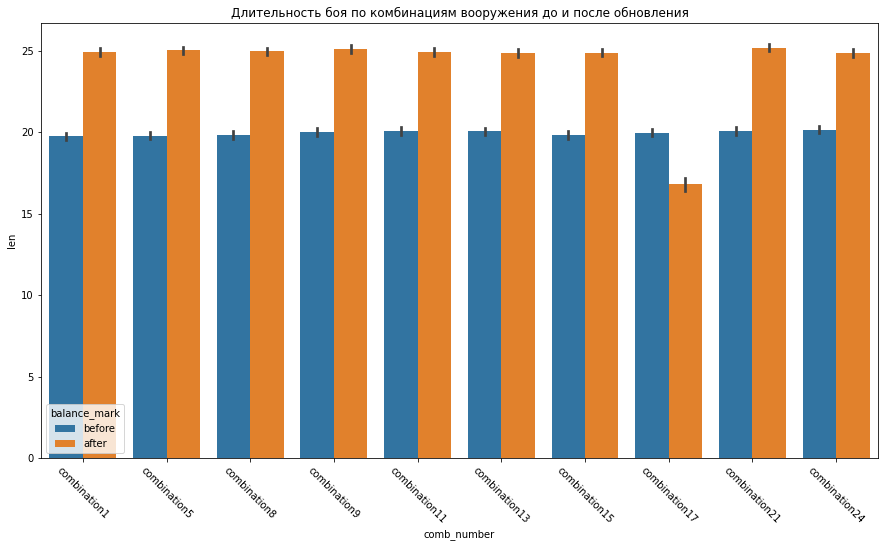

In [13]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=315)
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=popular_data, x='comb_number', y='len', hue='balance_mark')

Заметна аномалия в 17 комбинации - здесь не просто различаются значения, но и после обновления бои стали быстрее. Остальные комбинации практически одинаково поменялись, поэтому для проверки гипотезы о равенстве средней длительности игровой сессии до и после патча возьмем для теста 1 комбинацию.

In [14]:
def comb1_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = sorted(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = n
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
comb1_data = popular_data.query('comb_number == "combination1"')
comb1_data['comb1_number'] = comb1_data.apply(comb1_number, axis=1)  
comb1_data

<ipython-input-14-5e66b57dd3f5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb1_data['comb1_number'] = comb1_data.apply(comb1_number, axis=1)


,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination,comb_number,comb1_number
0,103921,топор,лук,булава,лук,17.35,before,mixed,combination1,1
18,107617,булава,топор,лук,топор,19.36,before,mixed,combination1,2
78,105270,топор,топор,лук,булава,22.79,before,mixed,combination1,2
79,116987,топор,лук,булава,топор,22.12,before,mixed,combination1,2
88,114623,булава,лук,топор,топор,22.32,before,mixed,combination1,2
...,...,...,...,...,...,...,...,...,...,...
11492,113439,лук,топор,лук,булава,27.69,after,mixed,combination1,1
11494,105010,лук,топор,булава,булава,26.68,after,mixed,combination1,3
11500,117553,топор,булава,лук,лук,22.71,after,mixed,combination1,1
11509,118708,булава,лук,топор,топор,25.02,after,mixed,combination1,2


In [15]:
before = comb1_data.query('balance_mark == "before"')['len']
after = comb1_data.query('balance_mark == "after"')['len']
before = before[: min(len(before), len(after))]
after = after[: min(len(before), len(after))]
results = st.ttest_rel(before.values.tolist(), after.values.tolist())
print('p-значение: ', results.pvalue)
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между патчами есть разница в балансе')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать баланс между патчами ощутимым')

p-значение:  5.396958241941457e-133
Отвергаем нулевую гипотезу: между патчами есть разница в балансе


При статистической значимости в 0.05 отвергается гипотеза о равенстве длительности боя до и после патча. Проверим на графике по вариациям в этой первой комбинации.

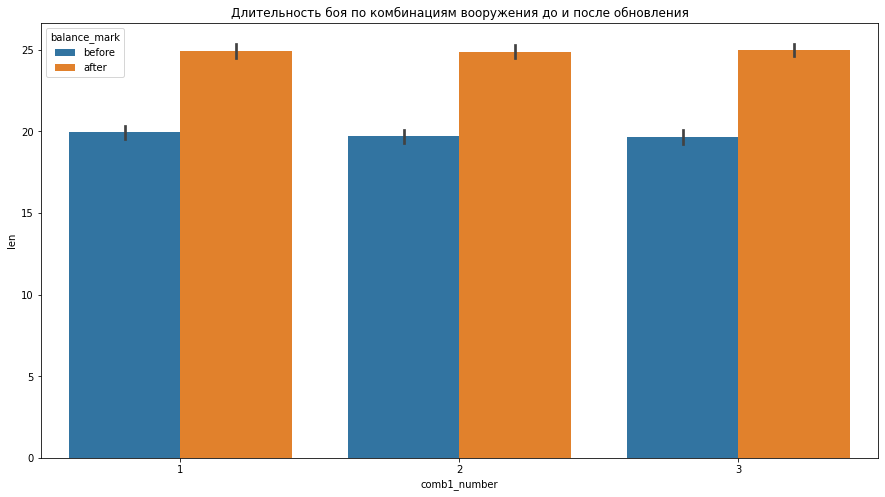

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=comb1_data, x='comb1_number', y='len', hue='balance_mark')

Абсолютно одинаковые изменения независимо от того, используете ли вы тройке вооружения [булава, топор, лук] два лука, или два топора, или две булавы.

И наконец проверим аномальную 17 комбинацию на гипотезу о равенстве средней длительности боя до и после патча.

In [17]:
data.loc[data.loc[:, 'comb_number'] == 'combination17'][['unit_1', 'unit_2', 'unit_3', 'unit_4']]

,unit_1,unit_2,unit_3,unit_4
20,булава,топор,булава,меч
26,меч,топор,меч,булава
31,меч,топор,меч,булава
40,топор,меч,топор,булава
48,меч,булава,меч,топор
...,...,...,...,...
19878,булава,меч,топор,топор
19975,меч,топор,меч,булава
19982,меч,топор,булава,меч
19986,булава,топор,булава,меч


В этой комбинации нет лука или посоха, поэтому их отметаем. Проверим гипотезу о равенстве средней длительности двух зависимых выборок до и после патча в 17 комбинации. 

In [18]:
def comb17_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = sorted(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = n
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
comb17_data = popular_data.query('comb_number == "combination17"')
comb17_data['comb17_number'] = comb17_data.apply(comb17_number, axis=1)  
comb17_data

<ipython-input-18-420524458795>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb17_data['comb17_number'] = comb17_data.apply(comb17_number, axis=1)


,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination,comb_number,comb17_number
10,114412,булава,топор,булава,меч,21.16,before,mixed,combination17,1
12,112830,меч,топор,меч,булава,21.74,before,mixed,combination17,2
16,110126,меч,топор,меч,булава,19.93,before,mixed,combination17,2
21,112147,топор,меч,топор,булава,15.53,before,mixed,combination17,3
27,112925,меч,булава,меч,топор,17.27,before,mixed,combination17,2
...,...,...,...,...,...,...,...,...,...,...
11449,113182,булава,меч,топор,топор,19.73,after,mixed,combination17,3
11508,115038,меч,топор,меч,булава,19.81,after,mixed,combination17,2
11512,107910,меч,топор,булава,меч,20.08,after,mixed,combination17,2
11514,119244,булава,топор,булава,меч,7.01,after,mixed,combination17,1


In [19]:
before = comb17_data.query('balance_mark == "before"')['len']
after = comb17_data.query('balance_mark == "after"')['len']
before = before[: min(len(before), len(after))]
after = after[: min(len(before), len(after))]
results = st.ttest_rel(before.values.tolist(), after.values.tolist())
print('p-значение: ', results.pvalue)
alpha = .05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между патчами есть разница в балансе')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать баланс между патчами ощутимым')

p-значение:  1.3867124113370227e-32
Отвергаем нулевую гипотезу: между патчами есть разница в балансе


Посмотрим по 17 комбинации, где же все же скрыт имбаланс

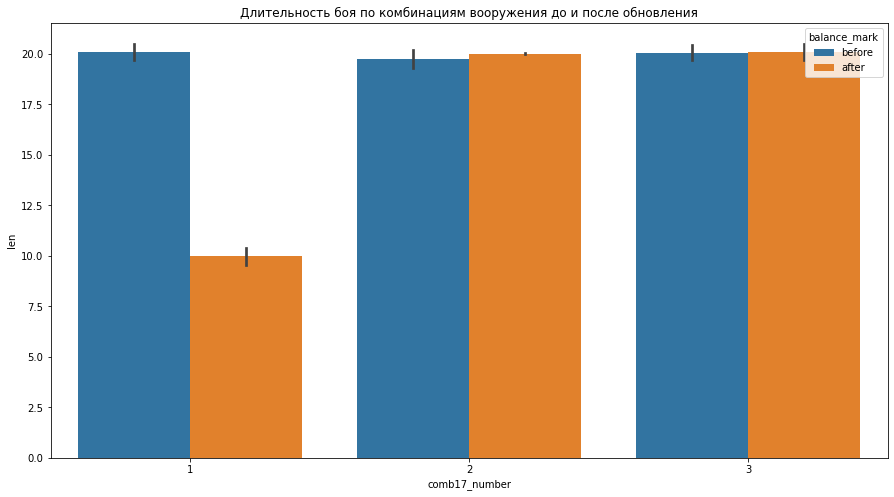

In [20]:
plt.figure(figsize=(15, 8))
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=comb17_data, x='comb17_number', y='len', hue='balance_mark')

Вот и очевидные результаты в 1 наборе 17 комбинации. Смотрим, что это за конкретная вариация

In [21]:
comb17_data.loc[comb17_data.loc[:, 'comb17_number'] == 1][['unit_1', 'unit_2', 'unit_3', 'unit_4']]

,unit_1,unit_2,unit_3,unit_4
10,булава,топор,булава,меч
47,меч,булава,булава,топор
67,топор,булава,булава,меч
119,меч,топор,булава,булава
146,булава,булава,меч,топор
...,...,...,...,...
11427,топор,булава,меч,булава
11438,булава,булава,топор,меч
11447,меч,булава,топор,булава
11514,булава,топор,булава,меч


Вот и выясняли - после обновления с 20 до 10 секунд сократился бой с применением **двух булав** в комбинации с *мечом* и *топором*.

**ДОПОЛНИТЕЛЬНОЕ ИССЛЕДОВАНИЕ**

Проверим различие в тенденции по не самым популярным билдам 

In [22]:
unpopular = ['combination26', 'combination27', 'combination28', 'combination29', 'combination30']
unpopular_data_before = data_before.query('comb_number not in @popular and comb_number not in @unpopular')
unpopular_data_after = data_after.query('comb_number not in @popular and comb_number not in @unpopular')

In [23]:
unpopular_data = pd.concat([unpopular_data_before, unpopular_data_after], ignore_index=True)
unpopular_data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,combination,comb_number
0,117214,посох,посох,лук,лук,21.84,before,mixed,combination2
1,115502,меч,посох,булава,топор,16.00,before,full unique,combination3
2,110102,булава,лук,лук,булава,17.22,before,mixed,combination4
3,115254,лук,меч,меч,лук,17.32,before,mixed,combination6
4,119884,топор,булава,лук,посох,18.01,before,full unique,combination7
...,...,...,...,...,...,...,...,...,...
8304,101030,булава,посох,булава,посох,28.71,after,mixed,combination19
8305,117522,топор,посох,лук,булава,25.64,after,full unique,combination7
8306,111256,посох,лук,топор,меч,20.99,after,full unique,combination18
8307,104607,меч,посох,топор,булава,20.09,after,full unique,combination3


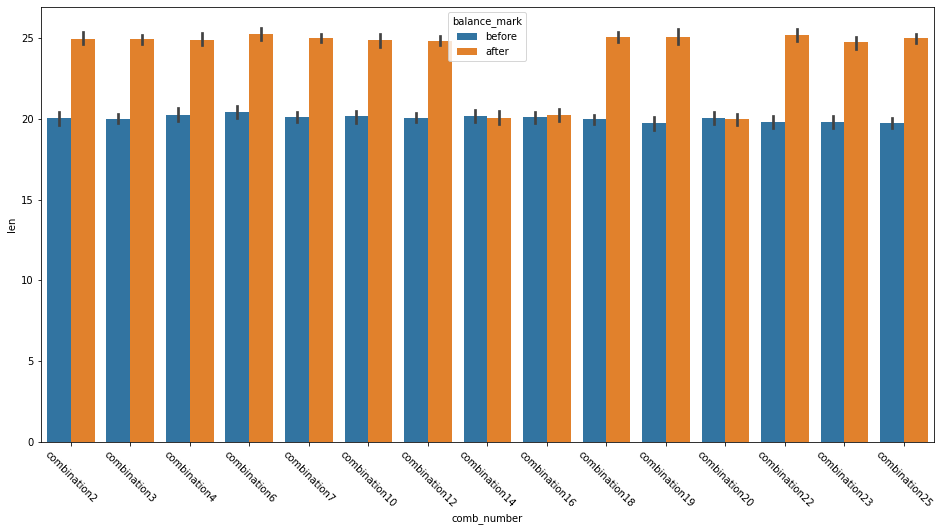

In [24]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=315)
graph = sns.barplot(data=unpopular_data, x='comb_number', y='len', hue='balance_mark')

комбинации 14, 16 и 20 тоже выбиваются из общей тенденции - глянем на них

In [25]:
data.loc[data.loc[:, 'comb_number'] == 'combination14'][['unit_1', 'unit_2', 'unit_3', 'unit_4']]

,unit_1,unit_2,unit_3,unit_4
15,топор,булава,топор,топор
45,булава,топор,топор,топор
218,булава,булава,топор,топор
317,топор,топор,булава,топор
341,топор,булава,топор,топор
...,...,...,...,...
19768,булава,топор,топор,топор
19916,булава,булава,топор,булава
19926,топор,топор,топор,булава
19934,топор,топор,топор,булава


In [26]:
data.loc[data.loc[:, 'comb_number'] == 'combination16'][['unit_1', 'unit_2', 'unit_3', 'unit_4']]

,unit_1,unit_2,unit_3,unit_4
19,меч,меч,топор,топор
194,меч,топор,меч,топор
195,топор,меч,топор,меч
199,топор,меч,меч,топор
229,топор,меч,меч,меч
...,...,...,...,...
19684,меч,меч,топор,топор
19754,топор,топор,меч,топор
19802,топор,меч,меч,меч
19886,топор,меч,топор,меч


In [27]:
data.loc[data.loc[:, 'comb_number'] == 'combination20'][['unit_1', 'unit_2', 'unit_3', 'unit_4']]

,unit_1,unit_2,unit_3,unit_4
28,меч,меч,булава,меч
39,меч,меч,булава,меч
92,булава,меч,меч,меч
95,булава,булава,меч,булава
112,меч,булава,меч,булава
...,...,...,...,...
19731,меч,меч,булава,меч
19733,меч,булава,меч,булава
19777,меч,булава,меч,булава
19804,меч,булава,меч,булава


Собственно говоря и так было понятно, что с оружием ближнего боя баланс не сильно поменялся, а кое-где даже стали быстрее бои. 

<ipython-input-28-9ef6e449db82>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb14_data['comb14_number'] = comb14_data.apply(comb14_number, axis=1)


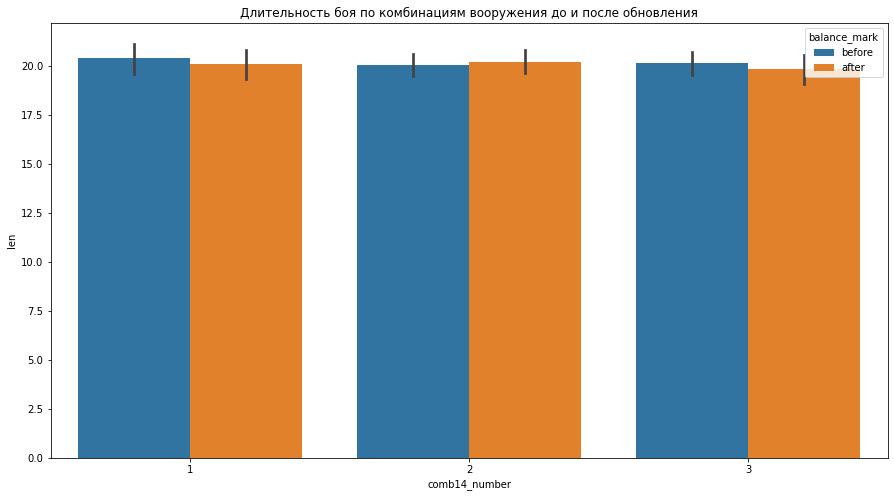

In [28]:
def comb14_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = sorted(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = n
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
comb14_data = unpopular_data.query('comb_number == "combination14"')
comb14_data['comb14_number'] = comb14_data.apply(comb14_number, axis=1)  
plt.figure(figsize=(15, 8))
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=comb14_data, x='comb14_number', y='len', hue='balance_mark')

<ipython-input-29-4c47c375f34b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb16_data['comb16_number'] = comb16_data.apply(comb16_number, axis=1)


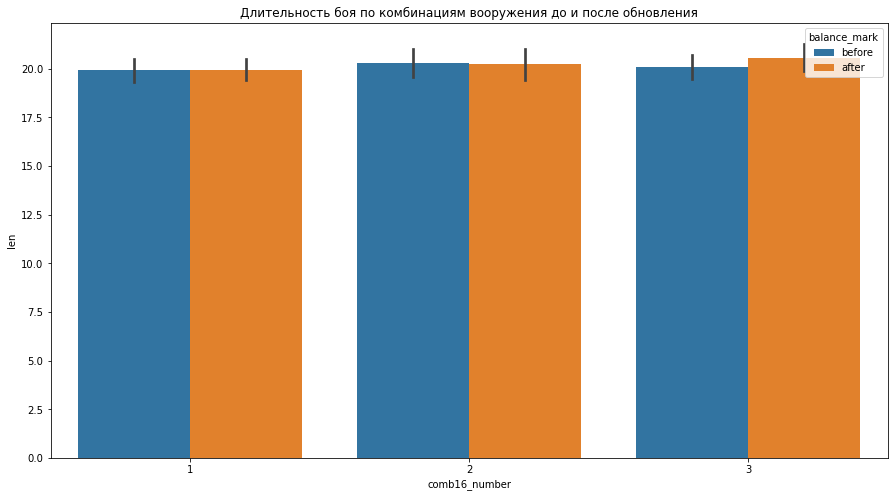

In [29]:
def comb16_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = sorted(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = n
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
comb16_data = unpopular_data.query('comb_number == "combination16"')
comb16_data['comb16_number'] = comb16_data.apply(comb16_number, axis=1)  
plt.figure(figsize=(15, 8))
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=comb16_data, x='comb16_number', y='len', hue='balance_mark')

<ipython-input-30-d1ffc4ae476e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb20_data['comb20_number'] = comb20_data.apply(comb20_number, axis=1)


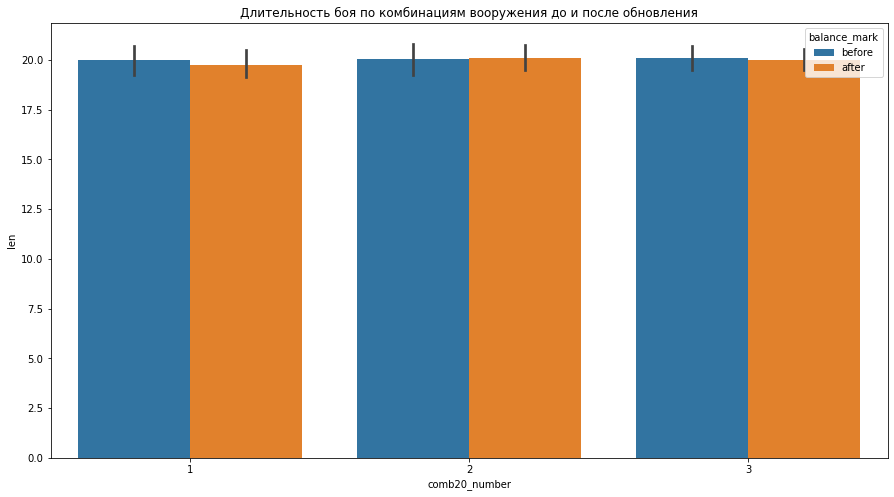

In [30]:
def comb20_number(row):
    global n
    x1, x2, x3, x4 = row['unit_1'], row['unit_2'], row['unit_3'], row['unit_4']
    q = [x1, x2, x3, x4]
    q = sorted(q)
    if q not in list1:
        list1.append(q)
        n += 1
        diary[str(q)] = n
    return diary[str(q)]
    
list1 = []    
diary = dict()
n = 0
comb20_data = unpopular_data.query('comb_number == "combination20"')
comb20_data['comb20_number'] = comb20_data.apply(comb20_number, axis=1)  
plt.figure(figsize=(15, 8))
plt.title('Длительность боя по комбинациям вооружения до и после обновления')
graph = sns.barplot(data=comb20_data, x='comb20_number', y='len', hue='balance_mark')

Удостоверились, что каких-то аномалий нет и что до обновления, что после - баланс никак не изменился, в отличие от тех комбинаций, где присутствуют луки и посохи.

**ОБЩИЙ ВЫВОД**

1) Комбинации, где присутствуют луки и(или) посохи стали после обновления дольше (в среднем на 20%)

2) Комбинации только с ближним оружием: мечами и(или) топорами и(или) булавами - в среднем не поменялись по длительности.

3) Единственный момент - комбинация с двумя булавами, мечом и топором стала аж в два раза быстрее. Видимо, скрытая имба патча раскрылась.